Linear Associator Accuracy: 40.28%


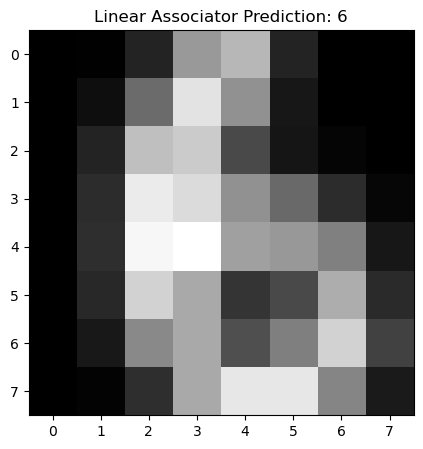

Hopfield Network Accuracy: 82.19%


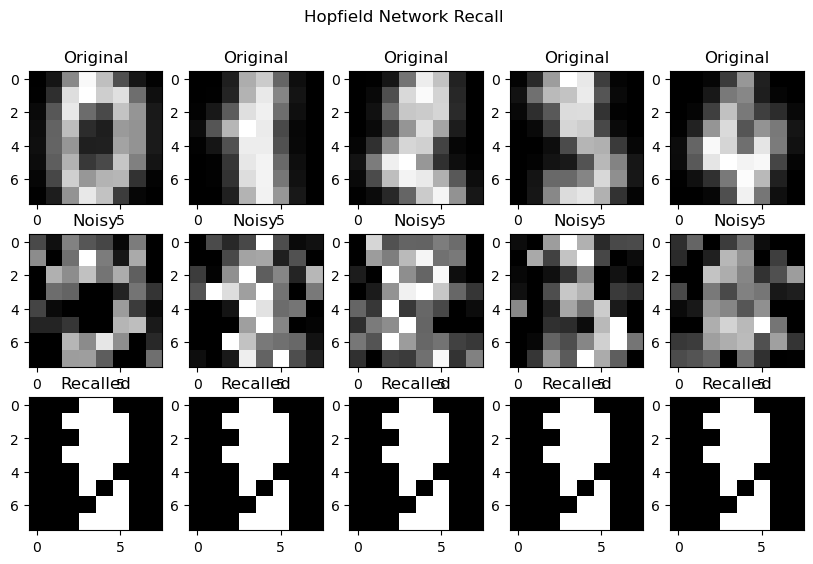

BAM Accuracy: 30.00%


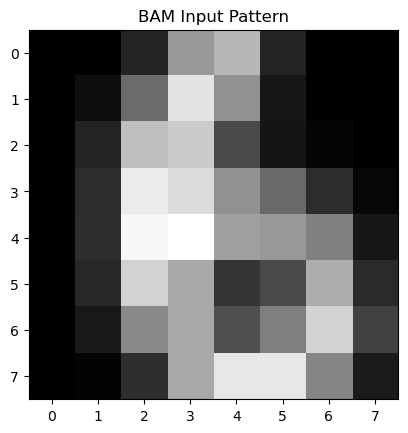


Comparison:
Linear Associator Accuracy: 40.28%
Hopfield Network Accuracy: 82.19%
BAM Accuracy: 30.00%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

file_path = "MNIST_8x8.xlsx"
df = pd.read_excel(file_path)

labels = df.iloc[:, 0].values
pixels = df.iloc[:, 1:].values.reshape(-1, 8, 8)

pixels = pixels / np.max(pixels)

X = pixels.reshape(len(pixels), -1)
y = labels

# one-hot encoding
Y = np.eye(10)[y]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Linear Associator 
W = np.dot(Y_train.T, X_train)
Y_pred = np.dot(X_test, W.T)
predicted_labels = np.argmax(Y_pred, axis=1)
true_labels = np.argmax(Y_test, axis=1)
linear_acc = np.mean(predicted_labels == true_labels) * 100
print(f"Linear Associator Accuracy: {linear_acc:.2f}%")

#sample original image
plt.figure(figsize=(5, 5))
plt.imshow(X_test[0].reshape(8, 8), cmap="gray")
plt.title(f"Linear Associator Prediction: {predicted_labels[0]}")
plt.show()

#Hopfield Network
num_patterns = 10
indices = [np.where(y == i)[0][0] for i in range(num_patterns)]
X_train_hopfield = X[indices]

# Convert to binary
X_train_hopfield = np.where(X_train_hopfield > 0.5, 1, -1)

N = X_train_hopfield.shape[1]
W_hopfield = np.zeros((N, N))
for x in X_train_hopfield:
    W_hopfield += np.outer(x, x)
np.fill_diagonal(W_hopfield, 0)

def recall_pattern(x, W, max_iter=10):
    x = np.where(x > 0.5, 1, -1)  # Ensure binary input
    for _ in range(max_iter):
        x_new = np.sign(np.dot(W, x))
        if np.array_equal(x, x_new):  # Stop if converged
            break
        x = x_new
    return x

# Test with noise
X_test_hopfield = X[:5]
X_noisy = X_test_hopfield + np.random.normal(0, 0.3, X_test_hopfield.shape)
X_noisy = np.clip(X_noisy, 0, 1)  #valid range
X_recalled = np.array([recall_pattern(x, W_hopfield) for x in X_noisy])


hopfield_acc = np.mean(X_recalled == np.where(X_test_hopfield > 0.5, 1, -1)) * 100
print(f"Hopfield Network Accuracy: {hopfield_acc:.2f}%")

#Hopfield recall images
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i in range(5):
    axes[0, i].imshow(X_test_hopfield[i].reshape(8, 8), cmap="gray")
    axes[0, i].set_title("Original")
    axes[1, i].imshow(X_noisy[i].reshape(8, 8), cmap="gray")
    axes[1, i].set_title("Noisy")
    axes[2, i].imshow(X_recalled[i].reshape(8, 8), cmap="gray")
    axes[2, i].set_title("Recalled")
plt.suptitle("Hopfield Network Recall")
plt.show()

#Bi-Directional Associative Memory
X_train_bam, Y_train_bam = X_train[:10], Y_train[:10]
W_bam = np.dot(X_train_bam.T, Y_train_bam)

def recall_bam(x, W, max_iter=10):
    x = np.where(x > 0.5, 1, -1)  
    for _ in range(max_iter):
        y = np.sign(np.dot(W.T, x))
        x = np.sign(np.dot(W, y))
    return y

Y_pred_bam = np.array([recall_bam(x, W_bam) for x in X_test[:10]])

#BAM Accuracy
bam_acc = np.mean(np.argmax(Y_pred_bam, axis=1) == np.argmax(Y_test[:10], axis=1)) * 100
print(f"BAM Accuracy: {bam_acc:.2f}%")

#BAM recall result
plt.imshow(X_test[0].reshape(8, 8), cmap="gray")
plt.title("BAM Input Pattern")
plt.show()


print(f"\nComparison:\nLinear Associator Accuracy: {linear_acc:.2f}%\nHopfield Network Accuracy: {hopfield_acc:.2f}%\nBAM Accuracy: {bam_acc:.2f}%")
